In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame({"Y" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                   "X1" : [1, 3, 6, 4, 4, 4, 3, 1, 3, 4], 
                   "X2" : [9, 9, 5, 6, 8, 1, 5, 6, 6, 1]})

Text(0, 0.5, 'Y')

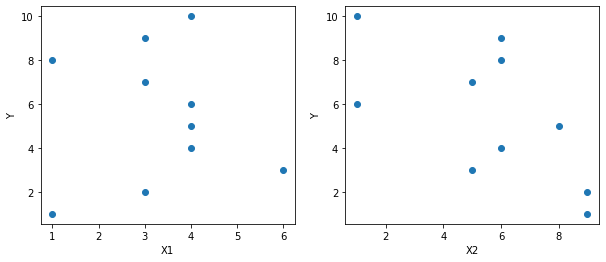

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(data=df, x="X1", y="Y")
plt.xlabel("X1")
plt.ylabel("Y")
plt.subplot(1, 2, 2)
plt.scatter(data=df, x="X2", y="Y")
plt.xlabel("X2")
plt.ylabel("Y")

In [5]:
df2 = pd.DataFrame({"X1" : [1, 2, 3, 4, 5, 5, 7, 9, 9, 10], 
                   "X2" : [2, 4, 6, 8, 10, 12, 13, 16, 17, 20],
                   "X3" : [3, 6, 9, 12, 15, 18, 22, 24, 28, 30]})
corr = round(df2.corr(), 2)
corr

,X1,X2,X3
X1,1.00,0.99,0.99
X2,0.99,1.00,0.99
X3,0.99,0.99,1.00


Text(0.5, 0.5, 'X3')

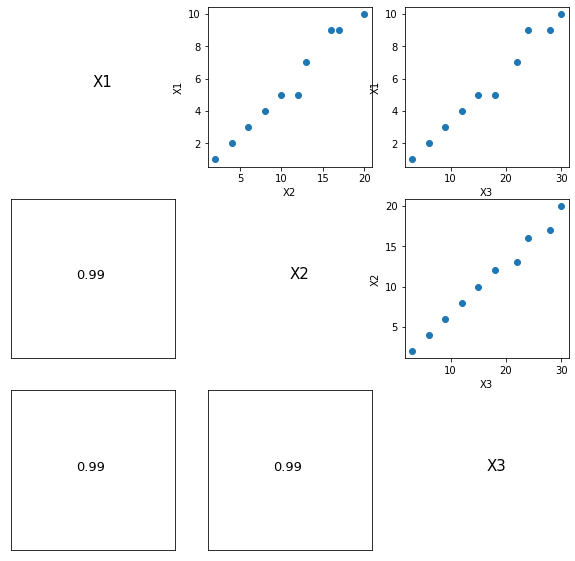

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 1)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X1", fontsize=15)

plt.subplot(3, 3, 2)
plt.scatter(data=df2, x="X2", y="X1")
plt.xlabel("X2")
plt.ylabel("X1")

plt.subplot(3, 3, 3)
plt.scatter(data=df2, x="X3", y="X1")
plt.xlabel("X3")
plt.ylabel("X1")

plt.subplot(3, 3, 4)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[0, 1], fontsize=13)

plt.subplot(3, 3, 5)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X2", fontsize=15)

plt.subplot(3, 3, 6)
plt.scatter(data=df2, x="X3", y="X2")
plt.xlabel("X3")
plt.ylabel("X2")

plt.subplot(3, 3, 7)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[0, 2], fontsize=13)

plt.subplot(3, 3, 8)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[1, 2], fontsize=13)

plt.subplot(3, 3, 9)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X3", fontsize=15)

In [18]:
np.random.seed(4)
x = np.random.rand(200)
y = x**2 - 6*x + 0.02*np.random.randn(200)

In [19]:
target = x
x_data1 = y
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.867e+04
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.44e-253
Time:                        15:08:25   Log-Likelihood:                 549.39
No. Observations:                 200   AIC:                            -1095.
Df Residuals:                     198   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0339      0.002    -14.038      0.000      -0.039      -0.029
x1            -0.2005      0.001   -262.056      0.000      -0.202      -0.199
==============================================================================
Omnibus:                       26.677   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.760
Skew:                           0.506   Prob(JB):                     0.000624
Kurtosis:                       2.136   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# create instance of influence
influence = fitted_model1.get_influence()

# obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

# DataFrame에 표준화 잔차 담기
resid = pd.DataFrame({'res' : standardized_residuals})
resid['idx'] = pd.DataFrame({i for i in range(0, len(standardized_residuals))})
resid['fitted'] = fitted_model1.predict(x_data1_1)

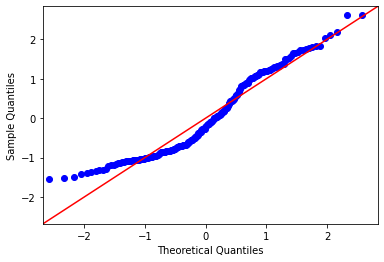

In [21]:
fig = sm.qqplot(resid['res'], fit=True, line='45')

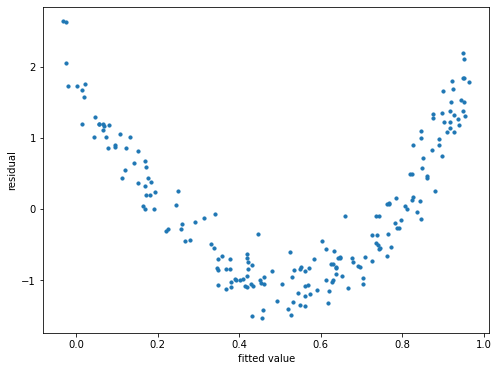

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x = resid['fitted'], y=resid['res'], s=10)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()

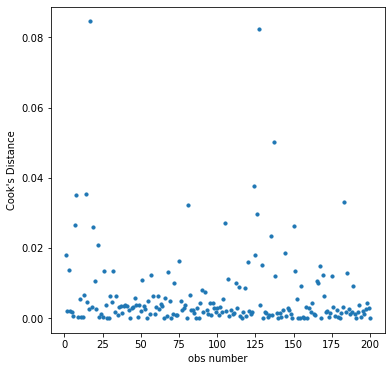

In [23]:
fig = plt.figure(figsize=(6,6))
idx = range(1,201)
cdis = influence.cooks_distance[0]
dfits = influence.dffits[0]
influential = pd.DataFrame({"Cook's Distance" : cdis, "DFITS" : dfits})
influential.describe()
plt.scatter(idx, influential["Cook's Distance"], s=10)
plt.xlabel('obs number')
plt.ylabel("Cook's Distance")
plt.show()